IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
# the reviews(sequenece of words) have been turned into sequence of integers,
# where each integer stands for a specific word in a dictionary

# Decoding reviews back to text

word_index = imdb.get_word_index() # dictionary mapping

reverse_word_index = dict(
    [(value, key) for(key, value) in word_index.items()]
) # reverse mapping

decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [ ]:
# Encoding the integer sequences via Multi-Hot encoding

def vectorize_sequences(sequences, dimension = 10000) :
  #create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences) :
    for j in sequence :
      #sets specific indices of results[i] to 1s
      results[i, j] = 1 # we can also write  rsults[i][j]
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# vectorizing labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Building the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Now, input data is vectors and the labels are scalar (1s and 0s)

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

In [ ]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [ ]:
# setting aside validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# training the model

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data = (x_val, y_val)
)

# model was overfitting when trained at epochs = 20
# so we reduced epochs  to 4

Epoch 1/4
30/30 [==============================] - 3s 73ms/step - loss: 0.5113 - accuracy: 0.7954 - val_loss: 0.3885 - val_accuracy: 0.8663
Epoch 2/4
30/30 [==============================] - 1s 35ms/step - loss: 0.3152 - accuracy: 0.8983 - val_loss: 0.3185 - val_accuracy: 0.8805
Epoch 3/4
30/30 [==============================] - 1s 37ms/step - loss: 0.2364 - accuracy: 0.9223 - val_loss: 0.2918 - val_accuracy: 0.8830
Epoch 4/4
30/30 [==============================] - 1s 35ms/step - loss: 0.1918 - accuracy: 0.9357 - val_loss: 0.2775 - val_accuracy: 0.8882


In [ ]:
import matplotlib.pyplot as plt

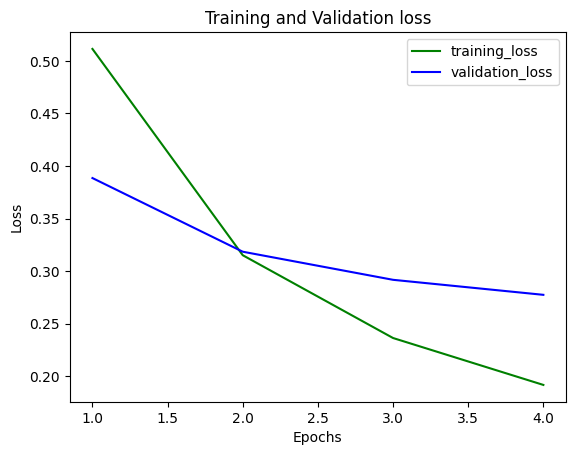

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label = "training_loss")
plt.plot(epochs, val_loss_values, "b", label = "validation_loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

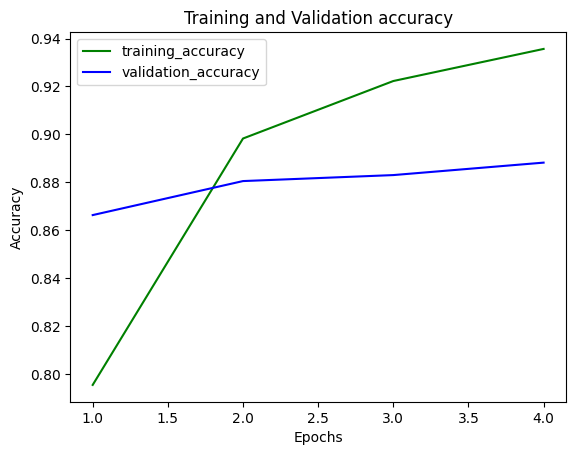

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc, "g", label = "training_accuracy")
plt.plot(epochs, val_acc, "b", label = "validation_accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Final results

results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2908 - accuracy: 0.8824
